In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
# small model (finetune)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Testis','Thyroid']
model_size = 'small'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    
    fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_xgb = auc(fpr_xgb, tpr_xgb)
    print("AUC : ", auc_xgb)



Adipose_Subcutaneous
accuracy:0.7948717948717948
precision:0.8181818181818182
recall:0.8181818181818182
f1-score:0.8181818181818182
AUC :  0.9076265614727154


Artery_Tibial
accuracy:0.8
precision:0.8260869565217391
recall:0.7916666666666666
f1-score:0.8085106382978724
AUC :  0.8567901234567901


Breast_Mammary_Tissue
accuracy:0.9583333333333334
precision:0.9411764705882353
recall:1.0
f1-score:0.9696969696969697
AUC :  0.9670138888888888


Colon_Transverse
accuracy:0.9696969696969697
precision:0.9333333333333333
recall:1.0
f1-score:0.9655172413793104
AUC :  0.9935720844811754


Nerve_Tibial
accuracy:0.8918918918918919
precision:0.9047619047619048
recall:0.9047619047619048
f1-score:0.9047619047619048
AUC :  0.8685171658144631


Testis
accuracy:0.7608695652173914
precision:0.8
recall:0.7692307692307693
f1-score:0.7843137254901961
AUC :  0.7901701323251418


Thyroid
accuracy:0.9347826086956522
precision:0.9259259259259259
recall:0.9615384615384616
f1-score:0.9433962264150944
AUC :  0.95

In [3]:
# small model (end-to-end)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Testis','Thyroid']
model_size = 'small'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    
    fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_xgb = auc(fpr_xgb, tpr_xgb)
    print("AUC : ", auc_xgb)



Adipose_Subcutaneous
accuracy:0.5897435897435898
precision:0.5789473684210527
recall:1.0
f1-score:0.7333333333333334
AUC :  0.4924391847468771


Artery_Tibial
accuracy:0.5333333333333333
precision:0.5333333333333333
recall:1.0
f1-score:0.6956521739130436
AUC :  0.5481481481481482


Breast_Mammary_Tissue
accuracy:0.625
precision:0.6666666666666666
recall:0.875
f1-score:0.7567567567567567
AUC :  0.6684027777777778


Colon_Transverse
accuracy:0.5757575757575758
precision:0.0
recall:0.0
f1-score:0.0
AUC :  0.5583103764921946


Nerve_Tibial
accuracy:0.6216216216216216
precision:0.6206896551724138
recall:0.8571428571428571
f1-score:0.7200000000000001
AUC :  0.5427319211102994


Testis
accuracy:0.6086956521739131
precision:0.6428571428571429
recall:0.6923076923076923
f1-score:0.6666666666666666
AUC :  0.555765595463138


Thyroid
accuracy:0.6304347826086957
precision:0.6551724137931034
recall:0.7307692307692307
f1-score:0.6909090909090909
AUC :  0.584593572778828


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


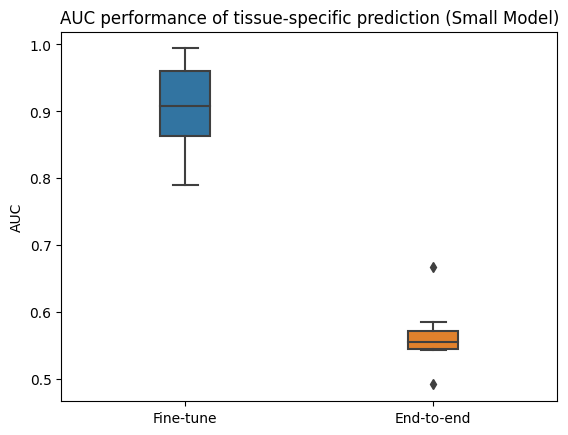

In [4]:
import seaborn as sns
NA = [0.908,0.856,0.967,0.994,0.869,0.790,0.954]
HG = [0.492,0.548,0.668,0.558,0.543,0.556,0.585]

df = pd.Series(NA, name="Fine-tune").to_frame().join(pd.Series(HG, name="End-to-end"))
sns.boxplot(data=df, width = 0.2) 
plt.title('AUC performance of tissue-specific prediction (Small Model)')
plt.ylabel('AUC')
plt.show()